## Load the model

In [2]:
from keras.models import Model,  load_model
model = load_model('model.h5')

## Load and predict a random image

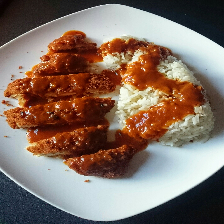

data/test/meat/chicken01000.jpg
actual: meat
prediction: meat


In [24]:
from random import choice
from IPython.display import display, Image, clear_output
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np

labels = ['vegan','dairy','meat']

def get_random_file(label, subset='test'):
    path = 'data/' + subset + '/' + label
    files = !ls $path
    return path + '/' + choice(files)

def get_image(img_path):
    img = load_img(img_path)
    img = img.resize((224,224))
    return img


def predict_diet(img):
    #the model expects a batch, so send it a batch with a size of 1
    y_prob = model.predict(np.expand_dims(img, axis=0))

    labels = ['dairy', 'meat', 'vegan']
    return labels[y_prob.argmax(axis=-1)[0]]

true_label = choice(labels)

f = get_random_file(true_label)
img = get_image(f)
display(img)
print(f)
print('actual:',true_label)

print('prediction:',predict_diet(img))

In [3]:
#save model structure to an image file

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)